In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from statsmodels.tsa import stattools
plt.style.use('me')

%matplotlib inline

/usr/local/pyenv/versions/3.5.3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


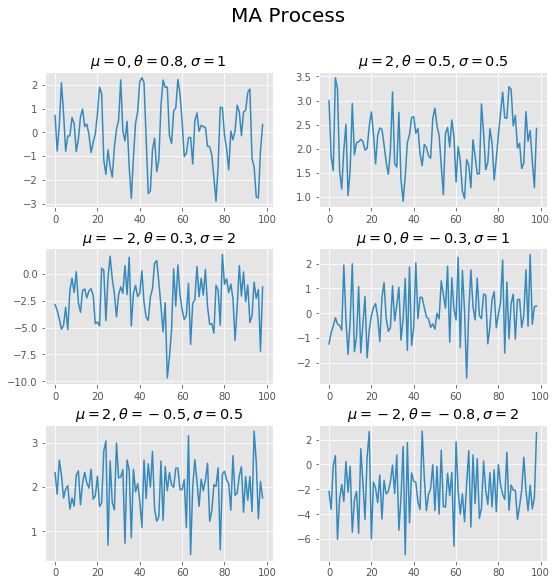

In [20]:
def y_t(noise, mean=1, theta=0.5):
    result = _y_t(noise[::-1], mean, theta)
    return np.around(result[::-1], 3)

def _y_t(noise, mean, theta=0.5):
    if len(noise) == 2:
        return [mean + noise[0] + theta * noise[1]]
    else:
        return [mean + noise[0] + theta * noise[1]] + _y_t(noise[1:], mean, theta)

plt.subplots(figsize=(9,9))
plt.subplot(321)
plt.title("${\mu=0, \\theta=0.8, \sigma=1}$")
plt.plot(y_t(np.random.normal(loc=0, scale=1.0, size=100), mean=0, theta=0.8))

plt.subplot(322)
plt.title("${\mu=2, \\theta=0.5, \sigma=0.5}$")
plt.plot(y_t(np.random.normal(loc=0, scale=0.5, size=100), mean=2, theta=0.5))

plt.subplot(323)
plt.title("${\mu=-2, \\theta=0.3, \sigma=2}$")
plt.plot(y_t(np.random.normal(loc=0, scale=2, size=100), mean=-2, theta=0.3))

plt.subplot(324)
plt.title("${\mu=0, \\theta=-0.3, \sigma=1}$")
plt.plot(y_t(np.random.normal(loc=0, scale=1, size=100), mean=0, theta=-0.3))

plt.subplot(325)
plt.title("${\mu=2, \\theta=-0.5, \sigma=0.5}$")
plt.plot(y_t(np.random.normal(loc=0, scale=0.5, size=100), mean=2, theta=-0.5))

plt.subplot(326)
plt.title("${\mu=-2, \\theta=-0.8, \sigma=2}$")
plt.plot(y_t(np.random.normal(loc=0, scale=2, size=100), mean=-2, theta=-0.8))

plt.suptitle('MA Process', fontsize=20)
plt.subplots_adjust(wspace=0.2, hspace=0.3)

(41,)

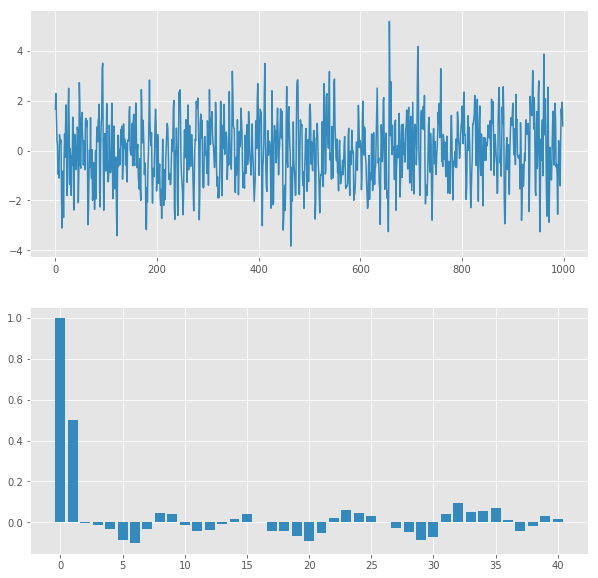

In [78]:
hoge = y_t(np.random.normal(loc=0, scale=1, size=1000), mean=0, theta=0.8)
acf = stattools.acf(hoge,nlags=40)

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(range(len(hoge)), hoge)

plt.subplot(212)
plt.bar(range(len(acf)), acf)
acf.shape

In [127]:
noise = [-2.1, 0.9, -0.2, -0.5, 0.3, -0.4, 0.8, 2.2, -0.6, 0.8]

def ar_y(noise, c, phi):
    return np.around(_ar_y(noise[1:], c, phi, [c + noise[0]]), 2)

def _ar_y(noise, c, phi, y=[]):
    if len(noise) == 0:
        return y
    else:
        return _ar_y(noise[1:], c, phi, y + [c + phi * y[-1] + noise[0]])
        
ar_y(noise, 1, 0.5)

array([-1.1 ,  1.35,  1.48,  1.24,  1.92,  1.56,  2.58,  4.49,  2.64,  3.12])

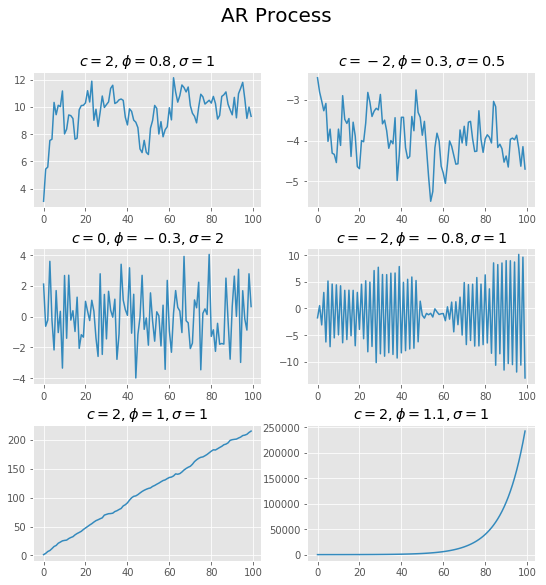

In [130]:
plt.subplots(figsize=(9,9))
plt.subplot(321)
plt.title("${c=2, \\phi=0.8, \sigma=1}$")
plt.plot(ar_y(np.random.normal(loc=0, scale=1.0, size=100), c=2, phi=0.8))

plt.subplot(322)
plt.title("${c=-2, \\phi=0.3, \sigma=0.5}$")
plt.plot(ar_y(np.random.normal(loc=0, scale=0.5, size=100), c=-2, phi=0.5))

plt.subplot(323)
plt.title("${c=0, \\phi=-0.3, \sigma=2}$")
plt.plot(ar_y(np.random.normal(loc=0, scale=2, size=100), c=0, phi=-0.3))

plt.subplot(324)
plt.title("${c=-2, \\phi=-0.8, \sigma=1}$")
plt.plot(ar_y(np.random.normal(loc=0, scale=1, size=100), c=-2, phi=-1))

plt.subplot(325)
plt.title("${c=2, \\phi=1, \sigma=1}$")
plt.plot(ar_y(np.random.normal(loc=0, scale=1, size=100), c=2, phi=1))

plt.subplot(326)
plt.title("${c=2, \\phi=1.1, \sigma=1}$")
plt.plot(ar_y(np.random.normal(loc=0, scale=1, size=100), c=2, phi=1.1))

plt.suptitle('AR Process', fontsize=20)
plt.subplots_adjust(wspace=0.2, hspace=0.3)

<Container object of 100 artists>

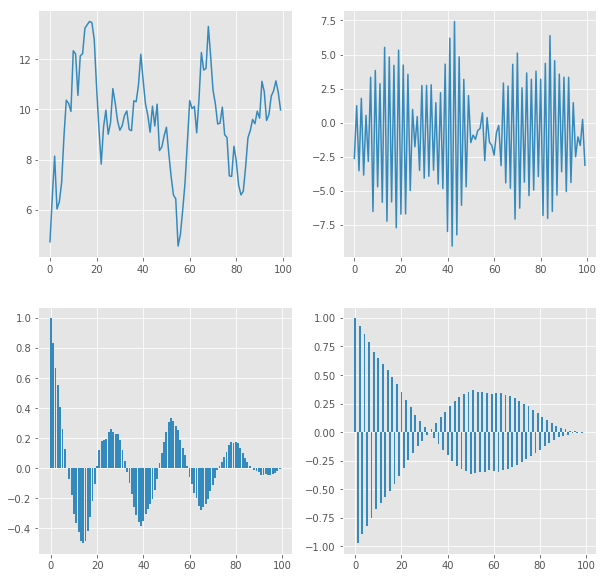

In [148]:
fuga, acf = [], []
fuga.append( ar_y(np.random.normal(loc=0, scale=1.0, size=100), c=2, phi=0.8) )
fuga.append( ar_y(np.random.normal(loc=0, scale=1, size=100), c=-2, phi=-1) )
acf.append( stattools.acf(fuga[0], nlags=100) )
acf.append( stattools.acf(fuga[1], nlags=100) )
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(range(len(fuga[0])), fuga[0])
plt.subplot(223)
plt.bar(range(len(acf[0])), acf[0])
plt.subplot(222)
plt.plot(range(len(fuga[1])), fuga[1])
plt.subplot(224)
plt.bar(range(len(acf[1])), acf[1])
